In [0]:
# -*- coding: utf-8 -*-
"""
Created on Wed May  8 14:54:58 2019

@author: Delgado
Fonte: https://www.kaggle.com/ahmethamzaemra/mlpclassifier-example/notebook
"""

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv('Dataset_spine.csv')

df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [0]:
df = df.drop(['Unnamed: 13'], axis=1) #Removendo Coluna "Unnamed: 13"

In [0]:
df.describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
Col1         310 non-null float64
Col2         310 non-null float64
Col3         310 non-null float64
Col4         310 non-null float64
Col5         310 non-null float64
Col6         310 non-null float64
Col7         310 non-null float64
Col8         310 non-null float64
Col9         310 non-null float64
Col10        310 non-null float64
Col11        310 non-null float64
Col12        310 non-null float64
Class_att    310 non-null object
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [0]:
"""
Col7 -> pelvic_slope -> inclinação pélvica
Col8 -> Direct_tilt -> Inclinação direta
Col9 -> thoracic_slope -> inclinação torácico
Col10 -> cervical_tilt - >inclinação cervical
Col11 -> sacrum_angle -> ângulo de sacro
Col12 -> scoliosis_slope -> inclinação da escoliose
"""

'\nCol7 -> pelvic_slope -> inclinação pélvica\nCol8 -> Direct_tilt -> Inclinação direta\nCol9 -> thoracic_slope -> inclinação torácico\nCol10 -> cervical_tilt - >inclinação cervical\nCol11 -> sacrum_angle -> ângulo de sacro\nCol12 -> scoliosis_slope -> inclinação da escoliose\n'

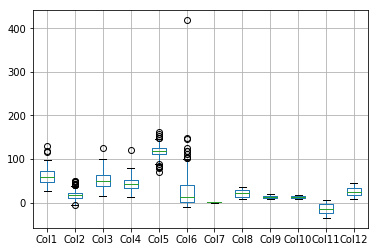

In [0]:
boxplot = df.boxplot(column=['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9',
       'Col10', 'Col11', 'Col12'])

In [0]:
df = df.drop(['Col7','Col8','Col9','Col10','Col11','Col12'], axis=1)

df.head()



,Col1,Col2,Col3,Col4,Col5,Col6,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

y = df['Class_att']
x = df.drop(['Class_att'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state=27)

In [0]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
clf.fit(x_train, y_train)

Iteration 1, loss = inf
Iteration 2, loss = 8.74253469
Iteration 3, loss = 1.55562179
Iteration 4, loss = 0.94416556
Iteration 5, loss = 1.50851327
Iteration 6, loss = 0.50784081
Iteration 7, loss = 0.39918410
Iteration 8, loss = 0.37867398
Iteration 9, loss = 0.37472479
Iteration 10, loss = 0.34567928
Iteration 11, loss = 0.34293793
Iteration 12, loss = 0.33180054
Iteration 13, loss = 0.33138624
Iteration 14, loss = 0.32280653
Iteration 15, loss = 0.32238711
Iteration 16, loss = 0.33164385
Iteration 17, loss = 0.31229600
Iteration 18, loss = 0.30823387
Iteration 19, loss = 0.32317560
Iteration 20, loss = 0.30697614
Iteration 21, loss = 0.30901736
Iteration 22, loss = 0.35327698
Iteration 23, loss = 0.31835192
Iteration 24, loss = 0.30599160
Iteration 25, loss = 0.30315921
Iteration 26, loss = 0.30774646
Iteration 27, loss = 0.30939928
Iteration 28, loss = 0.30205629
Iteration 29, loss = 0.30492366
Iteration 30, loss = 0.30627954
Iteration 31, loss = 0.32245209
Iteration 32, loss = 0.3

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=21, shuffle=True, solver='sgd', tol=1e-09,
              validation_fraction=0.1, verbose=10, warm_start=False)

In [0]:
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.7948717948717948


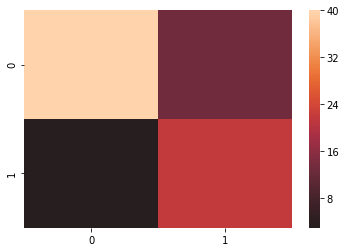

In [0]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, center=True)
plt.show()

In [0]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    Abnormal       0.93      0.75      0.83        53
      Normal       0.63      0.88      0.73        25

    accuracy                           0.79        78
   macro avg       0.78      0.82      0.78        78
weighted avg       0.83      0.79      0.80        78

